In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame


In [2]:
import matplotlib.pyplot as plt #引入绘图库
import datetime

In [3]:
import json as js
def save_json(name, data):
    json = data
    filename = name
    with open(filename,'w') as file_obj:
        js.dump(json,file_obj)

* 星级与产品的关系图
* x：时间， y：星级， 不同颜色（产品）折线图

In [4]:
microwave_csv = "../Problem_C_Data/microwave.tsv"
df_wave = pd.read_csv(microwave_csv, sep='\t')
df_wave

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,21879631,RY52KZABZK8QF,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,1,0,0,N,Y,Do not recommend it. go use your money for som...,3 of the buttons stopped working after a month...,8/31/2015
1,US,14964566,R3GCOEV4HYZG2I,B0055UBB4O,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Looks as good as the picture,Didn't use it long so I can't attest to that b...,8/31/2015
2,US,13230389,R1V2OPPNL0QGCE,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,4,0,0,N,Y,Four Stars,"Very nice microwave, great price",8/31/2015
3,US,43655888,R9Q0QDTLKV567,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,3,0,1,N,Y,quiet,"Quiet, but does not seem like 1000 watt power.",8/31/2015
4,US,117794,R3DL7HYC3QTWNI,B005GSZB7I,827502283,"whirlpool stainless look countertop microwave,...",Major Appliances,4,0,0,N,Y,Four Stars,It's bigger than I thought.,8/31/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,US,49010899,R2OXHMMI830KJ3,B00009V3X6,459626087,sharp 1.1-cubic-foot 850-watt over-the-range c...,Major Appliances,2,12,14,N,N,"A great, sleek oven... if you can get an undam...",We ordered one of these and were shipped an op...,9/13/2004
1611,US,40308862,RY9INWIK8MAL3,B00012ORT2,305608994,sharp 950-watt 1-2/5-cubic-foot over-the-range...,Major Appliances,3,20,53,N,N,What Happened to Sharp Quality?,I do not have this particular microwave; thoug...,7/20/2004
1612,US,36386173,RXOAWGI9Z98QY,B00009V3WZ,379992322,sharp 1-1/2-cubic-foot 1000-watt over-the-rang...,Major Appliances,4,19,19,N,Y,"Great microwave, little tough to mount",Its a pretty big and heavy unit so having some...,6/25/2004
1613,US,18471248,RVNWLGVDWE20J,B00009V3X8,379992322,sharp 1-1/2-cubic-foot 1000-watt over-the-rang...,Major Appliances,3,6,6,N,Y,Sharp could be Sharper,UPDATE: Yes i too had the door latch button me...,6/21/2004


423421857    394  
544821753     80  
109226352     79  
771401205     78  
827502283     76  
523301568     74  
295520151     74  
943347999     49   
305608994     45  
692404913     44  

# 主要的处理函数

In [5]:
# 按月计算累积销量
def amount_months_accum(raw_df, year = 2015, top_parent_s = 0, top_parent_e = 10 ):
    raw_df = raw_df[['review_date', 'star_rating', 'product_parent']]
    raw_df['review_date'] = pd.to_datetime(raw_df['review_date'])
    # 筛选指定年份
    dfList = []
    df = raw_df.loc[raw_df['review_date'].dt.year == year]
    for i in range(1, 13):
        dfList.append(df.loc[df['review_date'].dt.month <= i])
# dfList no problem

    topnames = raw_df['product_parent'].value_counts().index.tolist()[top_parent_s : top_parent_e]
#     topnames no problem

    maxn = 0
    json_list = []
    legend = []
    for i, item in enumerate(topnames):
#         item为产品的product_parent
        data = []
#         df.product_parent == topnames[i]
        for idx, row in enumerate(dfList):
            df = row
#             print(idx)
            num = len(df[df.product_parent == topnames[i]])
#             print(df)
#             print(item, idx, num)
            maxn = max(num, maxn)
            data.append( num )
        name = "%s(%d)" % (item, top_parent_s + i)
        legend.append(name)
        json_list.append({
            'name': name,
            'type' : 'line',
            'data':  data
        })
#         print(json_list) no problem
    json_obj = {
        'chart_name': 'Accumulated sales volume by month of %d' % year,
        'legend' : legend,
        'json_list' : json_list,
        'year_x' : ["01", "02", "03", "04", "05", "06","07","08","09","10","11", "12"],
        'yAxis' : {
            'min': 0,
            'max': maxn + int(maxn / 10),
            'interval':  max(0.5, int(maxn / 20) ),
        }
    }
    return json_obj

In [45]:
test = amount_months_accum(df_wave, 2014)
print(test)

{'chart_name': 'Accumulated sales volume by month of 2014', 'legend': ['423421857(0)', '544821753(1)', '109226352(2)', '771401205(3)', '827502283(4)', '523301568(5)', '295520151(6)', '943347999(7)', '305608994(8)', '692404913(9)'], 'json_list': [{'name': '423421857(0)', 'type': 'line', 'data': [3, 4, 12, 17, 24, 39, 49, 63, 77, 90, 107, 126]}, {'name': '544821753(1)', 'type': 'line', 'data': [3, 4, 7, 11, 12, 15, 20, 20, 22, 24, 24, 25]}, {'name': '109226352(2)', 'type': 'line', 'data': [3, 4, 9, 11, 11, 13, 18, 22, 23, 24, 26, 32]}, {'name': '771401205(3)', 'type': 'line', 'data': [5, 7, 9, 12, 15, 16, 18, 20, 21, 22, 25, 27]}, {'name': '827502283(4)', 'type': 'line', 'data': [4, 8, 8, 11, 11, 13, 17, 19, 19, 22, 27, 29]}, {'name': '523301568(5)', 'type': 'line', 'data': [2, 3, 8, 13, 15, 17, 22, 24, 27, 30, 31, 33]}, {'name': '295520151(6)', 'type': 'line', 'data': [4, 6, 11, 11, 11, 14, 14, 17, 18, 21, 23, 25]}, {'name': '943347999(7)', 'type': 'line', 'data': [1, 1, 1, 2, 2, 2, 2, 

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [47]:
monthAmount_top0to10_accum = amount_months_accum(df_wave, 2014)
save_json('../pro_data/wave/year_data/2014_month_amount_top0to10_accum.json', monthAmount_top0to10_accum)

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
# 按月计算不累计销量
def amount_months_notAccum(raw_df, year = 2015, top_parent_s = 0, top_parent_e = 10 ):
    raw_df = raw_df[['review_date', 'star_rating', 'product_parent']]
    raw_df['review_date'] = pd.to_datetime(raw_df['review_date'])
    # 筛选指定年份
    dfList = []
    df = raw_df.loc[raw_df['review_date'].dt.year == year]
    for i in range(1, 13):
        dfList.append(df.loc[df['review_date'].dt.month == i])
# dfList no problem

    topnames = raw_df['product_parent'].value_counts().index.tolist()[top_parent_s : top_parent_e]
#     topnames no problem

    maxn = 0
    json_list = []
    legend = []
    for i, item in enumerate(topnames):
#         item为产品的product_parent
        data = []
#         df.product_parent == topnames[i]
        for idx, row in enumerate(dfList):
            df = row
#             print(idx)
            num = len(df[df.product_parent == topnames[i]])
#             print(df)
#             print(item, idx, num)
            maxn = max(num, maxn)
            data.append( num )
        name = "%s(%d)" % (item, top_parent_s + i)
        legend.append(name)
        json_list.append({
            'name': name,
            'type' : 'line',
            'data':  data
        })
#         print(json_list) no problem
    json_obj = {
        'chart_name': 'Sales volume by month of %d' % year,
        'legend' : legend,
        'json_list' : json_list,
        'year_x' : ["01", "02", "03", "04", "05", "06","07","08","09","10","11", "12"],
        'yAxis' : {
            'min': 0,
            'max': maxn + int(maxn / 10),
            'interval':  max(0.5, int(maxn / 20) ),
        }
    }
    return json_obj

In [8]:
test = amount_months_notAccum(df_wave, 2014)
print(test)

{'chart_name': 'Sales volume by month of 2014', 'legend': ['423421857(0)', '544821753(1)', '109226352(2)', '771401205(3)', '827502283(4)', '523301568(5)', '295520151(6)', '943347999(7)', '305608994(8)', '692404913(9)'], 'json_list': [{'name': '423421857(0)', 'type': 'line', 'data': [3, 1, 8, 5, 7, 15, 10, 14, 14, 13, 17, 19]}, {'name': '544821753(1)', 'type': 'line', 'data': [3, 1, 3, 4, 1, 3, 5, 0, 2, 2, 0, 1]}, {'name': '109226352(2)', 'type': 'line', 'data': [3, 1, 5, 2, 0, 2, 5, 4, 1, 1, 2, 6]}, {'name': '771401205(3)', 'type': 'line', 'data': [5, 2, 2, 3, 3, 1, 2, 2, 1, 1, 3, 2]}, {'name': '827502283(4)', 'type': 'line', 'data': [4, 4, 0, 3, 0, 2, 4, 2, 0, 3, 5, 2]}, {'name': '523301568(5)', 'type': 'line', 'data': [2, 1, 5, 5, 2, 2, 5, 2, 3, 3, 1, 2]}, {'name': '295520151(6)', 'type': 'line', 'data': [4, 2, 5, 0, 0, 3, 0, 3, 1, 3, 2, 2]}, {'name': '943347999(7)', 'type': 'line', 'data': [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]}, {'name': '305608994(8)', 'type': 'line', 'data': [2, 0,

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
monthAmount_top0to10_notAccum = amount_months_notAccum(df_wave, 2014)
save_json('../pro_data/wave/year_data/2014_month_amount_top0to10_notAccum.json', monthAmount_top0to10_notAccum)

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
=======================这张图开始继续

In [25]:
def amount_accum(raw_df, top_parent_s = 0, top_parent_e = 10):
#总销量
    raw_df = raw_df[['review_date', 'star_rating', 'product_parent']]
    raw_df['review_date'] = pd.to_datetime(raw_df['review_date'])
    # 筛选指定年份
    dfList = []
    dfList.append(raw_df.loc[raw_df['review_date'].dt.year < 2008])
    dfList.append(raw_df.loc[raw_df['review_date'].dt.year < 2011])

    for i in range(2011, 2016):
        dfList.append(raw_df.loc[raw_df['review_date'].dt.year <= i])
#     print(dfList)
    topnames = raw_df['product_parent'].value_counts().index.tolist()[top_parent_s : top_parent_e]
#     print(topnames)

    maxn = 0
    json_list = []
    legend = []
    for i, item in enumerate(topnames):
        data = []
#         df.product_parent == topnames[i]
        
        for idx, row in enumerate(dfList):
            df = row
            num = len(df[df.product_parent == topnames[i]])
            maxn = max(num, maxn)
#             if num < min:
#                 min = num
            data.append( num )
        name = "%s(%d)" % (item, top_parent_s + i)
        legend.append(name)
        json_list.append({
            'name': name,
            'type' : 'line',
            'data':  data
        })
    
    json_obj = {
        'chart_name': 'Accumulated sales volume by year',
        'legend' : legend,
        'json_list' : json_list,
        'year_x' : ["04-07", "08-10", "11", "12", "13", "14", "15"],
        'yAxis' : {
            'min': 0,
            'max': maxn + int(maxn / 10),
            'interval':  max(0.5, int(maxn / 20) ),
        }
    }
    return json_obj


In [26]:
file = amount_accum(df_wave, 10, 20)
save_json('../pro_data/wave/year_amount_top10to20_accum.json', file)

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
# 不累加按年计算销量
def amount_notAccum(raw_df, top_parent_s = 0, top_parent_e = 10):
    raw_df = raw_df[['review_date', 'star_rating', 'product_parent']]
    raw_df['review_date'] = pd.to_datetime(raw_df['review_date'])
    # 筛选指定年份
    dfList = []
    dfList.append(raw_df.loc[raw_df['review_date'].dt.year < 2008])
    dfList.append(raw_df.loc[(raw_df['review_date'].dt.year >= 2008) & (raw_df['review_date'].dt.year < 2011)])

    for i in range(2011, 2016):
        dfList.append(raw_df.loc[raw_df['review_date'].dt.year == i])
#     print(dfList)
    topnames = raw_df['product_parent'].value_counts().index.tolist()[top_parent_s : top_parent_e]
#     print(topnames)

    maxn = 0
    json_list = []
    legend = []
    for i, item in enumerate(topnames):
#         item为产品的product_parent
        data = []
#         df.product_parent == topnames[i]
        for idx, row in enumerate(dfList):
            df = row
#             print(idx)
            num = len(df[df.product_parent == topnames[i]])
            # 2015年进行扩充
            if idx == 6:
                num = int(num * 1.5)
            maxn = max(num, maxn)
#             if num < min:
#                 min = num
            data.append( num )
        name = "%s(%d)" % (item, top_parent_s + i)
        legend.append(name)
        json_list.append({
            'name': name,
            'type' : 'line',
            'data':  data
        })
    json_obj = {
        'chart_name': 'Sales volume by year',
        'legend' : legend,
        'json_list' : json_list,
        'year_x' : ["04-07", "08-10", "11", "12", "13", "14", "15"],
        'yAxis' : {
            'min': 0,
            'max': maxn + int(maxn / 10),
            'interval':  max(0.5, int(maxn / 20) ),
        }
    }
    return json_obj

In [24]:
test = amount_notAccum(df_wave, 10, 20)
save_json('../pro_data/wave/year_amount_top10to20_notAccum.json', test)

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
# 按月累计星级
def star_accum(raw_df, year = 2015, top_parent = 10):
    raw_df = raw_df[['review_date', 'star_rating', 'product_parent']]
    raw_df['review_date'] = pd.to_datetime(raw_df['review_date'])
    # 筛选指定年份
    df = raw_df.loc[raw_df['review_date'].dt.year == year]
    topnames = raw_df['product_parent'].value_counts().index.tolist()[0 : top_parent]
    
    # 记录 topnames 和其 dataframe的dict
    wdict = {}
    names = []
    for idx,item in enumerate(topnames):
        df_t = df[df.product_parent == topnames[idx]]
        df_t['review_date'] = df_t['review_date'].map(lambda x: x.month)
        names.append("%s(%d)" % (item, idx))
        wdict[idx] = df_t
    
    legend = []
    json_list = []
    for i in wdict:
        months = [0]*12
        df = wdict[i]
#         print('print',i)
        for j in range(12):
            df_month = df.loc[df['review_date'] <= j + 1]
#             print(i, j, df_month)
            mean = df_month['star_rating'].mean()
            if np.isnan(mean):
#                 print(mean)
                mean = 0
            months[j] = float(mean)

        
        legend.append(names[i])
        json_list.append({
            'name': names[i],
            'type' : 'line',
            'data':  months
        })
    json_obj = {
        'chart_name': 'Accumulated stars mean by month of %d' % year,
        'legend' : legend,
        'json_list' : json_list,
        'year_x' : ["01", "02", "03", "04", "05", "06","07","08","09","10","11", "12"],
        'yAxis' : {
            'min': 0,
            'max': 5,
            'interval':  1
        }
    }
    return json_obj


In [16]:
star2015Amount_top0to10 = star_accum(df_wave, 2014)
save_json('../pro_data/wave/year_data/2014_month_stars_top0to10_accum.json', star2015Amount_top0to10)

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# 按月不累计星级
def star(raw_df, year = 2015, top_parent = 10 ):
    raw_df = raw_df[['review_date', 'star_rating', 'product_parent']]
    raw_df['review_date'] = pd.to_datetime(raw_df['review_date'])
    # 筛选指定年份
    df = raw_df.loc[raw_df['review_date'].dt.year == year]
#     下方注意是raw_df还是df，分别代表总表和筛选年份后的表
    topnames = raw_df['product_parent'].value_counts().index.tolist()[0 : top_parent]
#     print(topnames)
    wdict = {}
    names = []
    for idx,item in enumerate(topnames):
        df_t = df[df.product_parent == topnames[idx]]
        df_t['review_date'] = df_t['review_date'].map(lambda x: x.month)
        wdict[idx] = df_t
        names.append("%s(%d)" % (item, idx))
#     print(wdict)  wdict no problem
    legend = []
    json_list = []
    for i in wdict:
        months = [0]*12
        df = wdict[i].groupby(['review_date'], as_index = False)['star_rating'].mean()
        # 此处遇到mean为整数时， 则为numpy.int类型， json可能无法识别
#         print(i, "----", df)
        for idx, row in df.iterrows():
#             print(idx, row['review_date'], row['star_rating'])
            months[int(row['review_date']) - 1] = float(row['star_rating'])
        
        legend.append(names[i])
        json_list.append({
            'name': names[i],
            'type' : 'line',
            'data':  months
        })
#         print(i, months)
    json_obj = {
        'chart_name': 'Stars mean by month of %d' % year,
        'legend' : legend,
        'json_list' : json_list,
        'year_x' : ["01", "02", "03", "04", "05", "06","07","08","09","10","11", "12"],
        'yAxis' : {
            'min': 0,
            'max': 5,
            'interval':  1
        }
    }
    return json_obj

In [20]:
test = star(df_wave, 2014)
save_json('../pro_data/wave/year_data/2014_month_stars_top0to10_notAccum.json', test)

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 下面这一段代码用于生成多个json文件

In [15]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
for i in years:
    data = star_accum(df_wave, i)
    path = "../pro_data/wave/year_data/star%dAmount_top0to10_accum.json"% (i)
    save_json(path , data)

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [77]:
print(test)

{'legend': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 'json_list': [{'name': 0, 'type': 'line', 'data': [3.6666666666666665, 4.0, 4.0, 4.6, 3.7142857142857144, 3.533333333333333, 3.1, 4.357142857142857, 4.285714285714286, 4.230769230769231, 4.0, 4.052631578947368]}, {'name': 1, 'type': 'line', 'data': [5.0, 5.0, 4.6, 3.2, 3.5, 5.0, 4.8, 4.5, 3.3333333333333335, 4.666666666666667, 5.0, 4.0]}, {'name': 2, 'type': 'line', 'data': [4.333333333333333, 1.0, 4.0, 4.5, 0, 2.5, 3.2, 4.5, 5.0, 1.0, 5.0, 4.0]}, {'name': 3, 'type': 'line', 'data': [4.0, 4.5, 0, 5.0, 0, 4.5, 4.75, 3.0, 0, 1.3333333333333333, 3.8, 5.0]}, {'name': 4, 'type': 'line', 'data': [4.6, 3.5, 3.0, 4.666666666666667, 4.666666666666667, 5.0, 3.0, 4.5, 5.0, 4.0, 2.6666666666666665, 4.5]}, {'name': 5, 'type': 'line', 'data': [1.3333333333333333, 1.0, 1.0, 2.0, 1.0, 1.3333333333333333, 2.0, 0, 3.0, 3.5, 0, 1.0]}, {'name': 6, 'type': 'line', 'data': [2.0, 5.0, 3.4, 0, 0, 2.3333333333333335, 0, 2.3333333333333335, 5.0, 3.6

In [78]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
for i in years:
    data = star(df_wave, i)
    path = "../pro_data/wave/year_data/star%dAmount_top0to10.json"% (i)
    save_json(path , data)

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
# 看一看各年份的趋势

# 以下用于寻找下降/上升趋势的曲线
 | 下降 |  上升  
|-|-
| 1(13前升后降) | 4 |
| 7(13年猛降) | 5 |
|  | 6 |
|  | 5 |
|  | 6 |
|  | 9(14年猛升)  |
|  |    |
|  |    |
|  |    |
|  |    |

In [74]:
for i in range(3):
    yearAmount_temp = amount_notAccum(df_wave, i * 10, i * 10 + 10)
    path = "../pro_data/wave/yearAmount_top%dto%d.json"%((i*10),(i*10 + 10))
    save_json(path , yearAmount_temp)

['423421857(0)', '544821753(1)', '109226352(2)', '771401205(3)', '827502283(4)', '523301568(5)', '295520151(6)', '943347999(7)', '305608994(8)', '692404913(9)']
['459626087(10)', '486381187(11)', '930071734(12)', '690479711(13)', '464779766(14)', '565072108(15)', '242727854(16)', '494668275(17)', '392967251(18)', '618770050(19)']
['542519500(20)', '921964554(21)', '984005611(22)', '731025324(23)', '991090482(24)', '784164614(25)', '522487135(26)', '981162112(27)', '801135043(28)', '215953885(29)']


D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# 这之后是处理函数

In [85]:
df_wave

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,21879631,RY52KZABZK8QF,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,1,0,0,N,Y,Do not recommend it. go use your money for som...,3 of the buttons stopped working after a month...,2015-08-31
1,US,14964566,R3GCOEV4HYZG2I,B0055UBB4O,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Looks as good as the picture,Didn't use it long so I can't attest to that b...,2015-08-31
2,US,13230389,R1V2OPPNL0QGCE,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,4,0,0,N,Y,Four Stars,"Very nice microwave, great price",2015-08-31
3,US,43655888,R9Q0QDTLKV567,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,3,0,1,N,Y,quiet,"Quiet, but does not seem like 1000 watt power.",2015-08-31
4,US,117794,R3DL7HYC3QTWNI,B005GSZB7I,827502283,"whirlpool stainless look countertop microwave,...",Major Appliances,4,0,0,N,Y,Four Stars,It's bigger than I thought.,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,US,49010899,R2OXHMMI830KJ3,B00009V3X6,459626087,sharp 1.1-cubic-foot 850-watt over-the-range c...,Major Appliances,2,12,14,N,N,"A great, sleek oven... if you can get an undam...",We ordered one of these and were shipped an op...,2004-09-13
1611,US,40308862,RY9INWIK8MAL3,B00012ORT2,305608994,sharp 950-watt 1-2/5-cubic-foot over-the-range...,Major Appliances,3,20,53,N,N,What Happened to Sharp Quality?,I do not have this particular microwave; thoug...,2004-07-20
1612,US,36386173,RXOAWGI9Z98QY,B00009V3WZ,379992322,sharp 1-1/2-cubic-foot 1000-watt over-the-rang...,Major Appliances,4,19,19,N,Y,"Great microwave, little tough to mount",Its a pretty big and heavy unit so having some...,2004-06-25
1613,US,18471248,RVNWLGVDWE20J,B00009V3X8,379992322,sharp 1-1/2-cubic-foot 1000-watt over-the-rang...,Major Appliances,3,6,6,N,Y,Sharp could be Sharper,UPDATE: Yes i too had the door latch button me...,2004-06-21


8 0      review_date  star_rating  product_parent
502            1            5       109226352
533            1            5       109226352

In [27]:
list1 = [1,2,3,4,5]

list1 = [ str(x) for x in list1 ]
list1

['1', '2', '3', '4', '5']

# 处理下奶嘴/吹风机

In [77]:
hair_csv = "../Problem_C_Data/hair_dryer.tsv"
df_hair = pd.read_csv(hair_csv, sep='\t')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 27-28: invalid continuation byte

In [74]:

star2015Amount_top0to10 = star_accum(df_pacifier)
save_json('../pro_data/pacifier/star2015Amount_top0to10.json', star2015Amount_top0to10)


D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [75]:
yearAmount_top1to11__accum = amount_accum(df_pacifier, 1, 11)
save_json('../pro_data/pacifier/yearAmount_top1to11__accum.json', yearAmount_top1to11__accum)

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [76]:
yearAmount_top1to11 = amount_notAccum(df_pacifier, 1, 11)
save_json('../pro_data/pacifier/yearAmount_top1to11.json', yearAmount_top1to11)

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
star2015Amount_top0to10_notAccum = star(df_wave)
save_json('../pro_data/wave/star2015Amount_top0to10_notAccum.json', star2015Amount_top0to10_notAccum)

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [5]:
df['review_date'] = pd.to_datetime(df['review_date'])

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
df2015 = df.loc[df['review_date'].dt.year == 2015]

In [7]:
df2015

,review_date,star_rating,product_parent
0,2015-08-31,1,423421857
1,2015-08-31,5,423421857
2,2015-08-31,4,423421857
3,2015-08-31,3,423421857
4,2015-08-31,4,827502283
...,...,...,...
544,2015-01-01,5,464779766
545,2015-01-01,4,692404913
546,2015-01-01,5,423421857
547,2015-01-01,4,464779766


In [9]:
top7name = df2015['product_parent'].unique()[:7]

df2015[df2015.product_parent.isin(top7name)]

,review_date,star_rating,product_parent
0,2015-08-31,1,423421857
1,2015-08-31,5,423421857
2,2015-08-31,4,423421857
3,2015-08-31,3,423421857
4,2015-08-31,4,827502283
...,...,...,...
541,2015-01-02,3,423421857
542,2015-01-01,4,423421857
543,2015-01-01,5,423421857
545,2015-01-01,4,692404913


In [17]:
top7name

array([423421857, 827502283, 295520151, 771401205, 523301568, 565072108,
       692404913], dtype=int64)

In [40]:
wdict = {}
for idx,item in enumerate(top7name):
    df = df2015[df2015.product_parent == top7name[idx]]
    wdict[idx] = df

In [41]:
for i in wdict:
    print(wdict[i])

    review_date  star_rating  product_parent
0    2015-08-31            1       423421857
1    2015-08-31            5       423421857
2    2015-08-31            4       423421857
3    2015-08-31            3       423421857
5    2015-08-31            5       423421857
..          ...          ...             ...
539  2015-01-03            1       423421857
541  2015-01-02            3       423421857
542  2015-01-01            4       423421857
543  2015-01-01            5       423421857
546  2015-01-01            5       423421857

[259 rows x 3 columns]
    review_date  star_rating  product_parent
4    2015-08-31            4       827502283
39   2015-08-18            5       827502283
127  2015-07-15            2       827502283
167  2015-06-25            5       827502283
178  2015-06-18            5       827502283
204  2015-06-06            4       827502283
207  2015-06-05            5       827502283
222  2015-05-30            4       827502283
229  2015-05-27            4   

In [42]:
for i in (wdict):
    df = wdict[i]
    df['review_date'] = df['review_date'].map(lambda x: x.month)

D:\anaconda\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#copy place
    df['review_date'] = df['review_date'].map(lambda x: x.month)
    df = df.groupby(['review_date'], as_index = False)['star_rating'].mean()
    wdict[i] = df1
    json_list = []
for i in wdict:
    months = [0]*12
    df = wdict[i]
    for idx, row in df.iterrows():
#         print(idx, row['review_date'])
        months[int(row['review_date']) - 1] = row['star_rating']
    json_list.append({
        'name': i,
        'type' : 'line',
        'data':  months
    })

In [46]:
for i in (wdict):
    df = wdict[i]
    print(df)

     review_date  star_rating  product_parent
0              8            1       423421857
1              8            5       423421857
2              8            4       423421857
3              8            3       423421857
5              8            5       423421857
..           ...          ...             ...
539            1            1       423421857
541            1            3       423421857
542            1            4       423421857
543            1            5       423421857
546            1            5       423421857

[259 rows x 3 columns]
     review_date  star_rating  product_parent
4              8            4       827502283
39             8            5       827502283
127            7            2       827502283
167            6            5       827502283
178            6            5       827502283
204            6            4       827502283
207            6            5       827502283
222            5            4       827502283
229       

In [50]:
for i in (wdict):
    df = wdict[i]
    df1 = df.groupby(['review_date'], as_index = False)['star_rating'].mean()
    wdict[i] = df1
    print(df1)

   review_date  star_rating
0            1     3.481481
1            2     3.666667
2            3     3.750000
3            4     4.133333
4            5     4.320000
5            6     4.090909
6            7     3.659091
7            8     3.868421
   review_date  star_rating
0            1     4.000000
1            2     4.000000
2            3     4.000000
3            4     3.666667
4            5     4.333333
5            6     4.750000
6            7     2.000000
7            8     4.500000
   review_date  star_rating
0            1     2.000000
1            2     4.166667
2            3     1.000000
3            6     5.000000
4            7     3.333333
5            8     3.000000
   review_date  star_rating
0            1     1.000000
1            2     3.666667
2            3     5.000000
3            4     3.666667
4            5     3.000000
5            7     5.000000
6            8     5.000000
   review_date  star_rating
0            1     4.666667
1            2     5

In [61]:
json_list = []
for i in wdict:
    months = [0]*12
    df = wdict[i]
    for idx, row in df.iterrows():
#         print(idx, row['review_date'])
        months[int(row['review_date']) - 1] = row['star_rating']
    json_list.append({
        'name': i,
        'type' : 'line',
        'data':  months
    })
json_list

[{'name': 0,
  'type': 'line',
  'data': [3.4814814814814814,
   3.6666666666666665,
   3.75,
   4.133333333333334,
   4.32,
   4.090909090909091,
   3.659090909090909,
   3.8684210526315788,
   0,
   0,
   0,
   0]},
 {'name': 1,
  'type': 'line',
  'data': [4.0,
   4.0,
   4.0,
   3.6666666666666665,
   4.333333333333333,
   4.75,
   2.0,
   4.5,
   0,
   0,
   0,
   0]},
 {'name': 2,
  'type': 'line',
  'data': [2.0,
   4.166666666666667,
   1.0,
   0,
   0,
   5.0,
   3.3333333333333335,
   3.0,
   0,
   0,
   0,
   0]},
 {'name': 3,
  'type': 'line',
  'data': [1.0,
   3.6666666666666665,
   5.0,
   3.6666666666666665,
   3.0,
   0,
   5.0,
   5.0,
   0,
   0,
   0,
   0]},
 {'name': 4,
  'type': 'line',
  'data': [4.666666666666667,
   5.0,
   4.666666666666667,
   4.0,
   4.75,
   4.666666666666667,
   5.0,
   4.4,
   0,
   0,
   0,
   0]},
 {'name': 5,
  'type': 'line',
  'data': [3.6666666666666665,
   3.0,
   2.5,
   1.0,
   0,
   5.0,
   2.0,
   3.4285714285714284,
   0,
   

In [62]:
import json as js
filename='zhexian.json'
with open(filename,'w') as file_obj:
    js.dump(json_list,file_obj)

In [19]:
group = df2015.groupby(['product_parent',df2015['review_date'].apply(lambda x: x.month)])
for sgroup, value in group:
    print(sgroup)
    print(value)

(109226352, 1)
    review_date  star_rating  product_parent
502  2015-01-22            5       109226352
533  2015-01-05            5       109226352
(109226352, 2)
    review_date  star_rating  product_parent
424  2015-02-22            5       109226352
(109226352, 3)
    review_date  star_rating  product_parent
360  2015-03-15            2       109226352
(109226352, 4)
    review_date  star_rating  product_parent
281  2015-04-27            2       109226352
(109226352, 5)
    review_date  star_rating  product_parent
253  2015-05-13            2       109226352
256  2015-05-11            4       109226352
258  2015-05-09            1       109226352
(109226352, 7)
    review_date  star_rating  product_parent
89   2015-07-28            5       109226352
93   2015-07-27            4       109226352
96   2015-07-25            5       109226352
104  2015-07-24            5       109226352
115  2015-07-21            5       109226352
(109226352, 8)
   review_date  star_rating  product_par

355  2015-03-16            5       801135043
(801135043, 4)
    review_date  star_rating  product_parent
295  2015-04-21            4       801135043
(801135043, 5)
    review_date  star_rating  product_parent
230  2015-05-27            5       801135043
(801135043, 6)
    review_date  star_rating  product_parent
185  2015-06-16            5       801135043
(809249591, 3)
    review_date  star_rating  product_parent
334  2015-03-31            1       809249591
(827502283, 1)
    review_date  star_rating  product_parent
491  2015-01-25            1       827502283
507  2015-01-20            5       827502283
511  2015-01-16            5       827502283
530  2015-01-07            5       827502283
(827502283, 2)
    review_date  star_rating  product_parent
427  2015-02-22            3       827502283
428  2015-02-21            5       827502283
(827502283, 3)
    review_date  star_rating  product_parent
338  2015-03-26            5       827502283
365  2015-03-12            4       82750

In [66]:
groupsum = df2015.groupby(['product_parent',df2015['review_date'].apply(lambda x: x.month)], as_index = False).mean()
groupsum

,product_parent,star_rating
0,109226352,5.000000
1,109226352,5.000000
2,109226352,2.000000
3,109226352,2.000000
4,109226352,2.333333
...,...,...
140,991090482,5.000000
141,991090482,4.000000
142,991090482,5.000000
143,991090482,3.666667


In [64]:
groupsum1 = df2015.groupby(['product_parent'], as_index = False)
groupsum1

In [65]:
groupsum1 = groupsum1.groupby([df2015['review_date'].apply(lambda x: x.month)], as_index = False)

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [43]:
for i,key in enumerate(groupsum):
    print(i)
    print (groupsum[key])


0
product_parent  review_date
109226352       1              5.000000
                2              5.000000
                3              2.000000
                4              2.000000
                5              2.333333
                                 ...   
991090482       3              5.000000
                4              4.000000
                5              5.000000
                8              3.666667
994339247       1              5.000000
Name: star_rating, Length: 145, dtype: float64


In [45]:
gp_dict = dict(groupsum)

In [46]:
gp_list = list(groupsum)

In [60]:
for item in gp_dict:
    print(item)
    print(type(gp_dict[item]))

star_rating
<class 'pandas.core.series.Series'>


In [53]:
json = gp_dict
filename='data.json'
with open(filename,'w') as file_obj:
    js.dump(json,file_obj)

TypeError: Object of type Series is not JSON serializable

In [24]:
df_wave_n = df_wave.loc[ df_wave.verified_purchase == 'N' ,['product_title', 'review_date']]

In [33]:
def save(df, name):
    df.to_csv(path_or_buf="../Problem_C_Data/pro_data/"+ name ,index=False)

# 草稿区

# 存在打折区间的典型
samsung smh1816s 1.8 cu. ft. stainless steel over-the-range microwave
danby 0.7 cu.ft. countertop microwave  year < 2014

In [20]:
df_wave_n['product_title'].value_counts()

samsung smh1816s 1.8 cu. ft. stainless steel over-the-range microwave                                                                                                                             65
danby 0.7 cu.ft. countertop microwave                                                                                                                                                             31
sharp microwave drawer oven                                                                                                                                                                       29
whirlpool gh7208xrs gold 2.0 cu. ft. stainless steel over-the-range microwave                                                                                                                     25
frigidaire ffmv164l 1.6 cubic foot over-the-range microwave with fits-more capacity, 1,550 watts and,                                                                                             23
pem31smss ge pr

In [10]:
df_wave['product_parent'].value_counts()

423421857    394
544821753     80
109226352     79
771401205     78
827502283     76
523301568     74
295520151     74
943347999     49
305608994     45
692404913     44
459626087     41
486381187     33
930071734     32
690479711     30
464779766     28
565072108     28
242727854     27
494668275     26
392967251     25
618770050     24
542519500     23
921964554     21
984005611     19
731025324     19
991090482     16
784164614     15
522487135     15
981162112     15
801135043     14
215953885     14
168181302     14
721617315     13
166483932     13
809249591     13
838179571     12
760984384     12
572011672     12
994339247     12
379992322     11
155528792     11
309267414     11
147401377     10
862802057      1
788261054      1
149559260      1
313983847      1
550562680      1
664466484      1
311592014      1
454581724      1
494028413      1
539049610      1
542731946      1
632928046      1
665261008      1
Name: product_parent, dtype: int64

In [31]:
df_wave_n['review_date'] = pd.to_datetime(df_wave_n['review_date'])

In [32]:
df_wave_n.sort_values(by=["review_date"],ascending=[True],inplace=True)
df_wave_n

,product_title,review_date
1614,sharp 1.1-cubic-foot 850-watt over-the-range c...,2004-06-19
1611,sharp 950-watt 1-2/5-cubic-foot over-the-range...,2004-07-20
1610,sharp 1.1-cubic-foot 850-watt over-the-range c...,2004-09-13
1609,sharp 1-1/2-cubic-foot 1000-watt over-the-rang...,2004-09-18
1608,sharp 1.1-cubic-foot 850-watt over-the-range c...,2004-09-30
...,...,...
45,pem31smss ge profile spacemaker countertop mic...,2015-08-15
34,sharp rmotda252wrzz microwave turntable motor,2015-08-19
21,lg over-the-range microwave oven with 300 cfm ...,2015-08-24
14,lg over-the-range microwave oven with 300 cfm ...,2015-08-26


In [36]:
save(df_wave, 'todate_wave.csv')

In [48]:
def drawzhexian(x_num, y_num):

    fig = plt.figure(figsize = (8, 6))
    # 画图（点图）
    # fig, ax = plt.subplots()

    ax = fig.add_subplot(1,1,1)
    ax.plot(x_num, y_num)
    ax.set_xlabel('x')
    ax.set_ylabel(' y')
    plt.show()


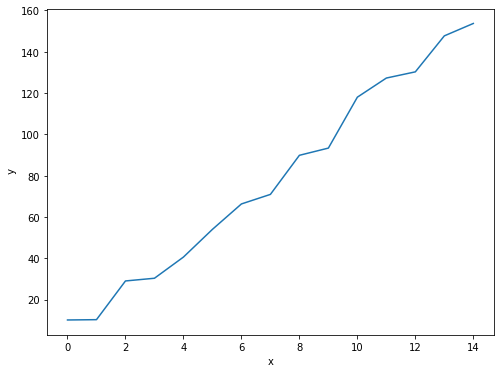

In [49]:
x_num=np.array(np.arange(15))
y_num=10*x_num+20*np.random.random(15)
drawzhexian(x_num, y_num)

In [16]:
df_wave['product_title'].unique().shape

(58,)

In [19]:
df_wave['product_parent'].value_counts()

423421857    394
544821753     80
109226352     79
771401205     78
827502283     76
523301568     74
295520151     74
943347999     49
305608994     45
692404913     44
459626087     41
486381187     33
930071734     32
690479711     30
464779766     28
565072108     28
242727854     27
494668275     26
392967251     25
618770050     24
542519500     23
921964554     21
984005611     19
731025324     19
991090482     16
784164614     15
522487135     15
981162112     15
801135043     14
215953885     14
168181302     14
721617315     13
166483932     13
809249591     13
838179571     12
760984384     12
572011672     12
994339247     12
379992322     11
155528792     11
309267414     11
147401377     10
862802057      1
788261054      1
149559260      1
313983847      1
550562680      1
664466484      1
311592014      1
454581724      1
494028413      1
539049610      1
542731946      1
632928046      1
665261008      1
Name: product_parent, dtype: int64

In [6]:
df_timestar = df_wave[['star_rating', 'review_date']]
df_timestar

,star_rating,review_date
0,1,8/31/2015
1,5,8/31/2015
2,4,8/31/2015
3,3,8/31/2015
4,4,8/31/2015
...,...,...
1610,2,9/13/2004
1611,3,7/20/2004
1612,4,6/25/2004
1613,3,6/21/2004


In [7]:
df_gp = df_timestar.groupby('review_date')
df_gp

In [6]:
microwave_csv = "../Problem_C_Data/microwave.tsv"
df_wave = pd.read_csv(microwave_csv, sep='\t')
type(df_wave)

pandas.core.frame.DataFrame

In [11]:
timeList = []
for name,group  in df_gp:
    timeList.append(name)
print(len(timeList))
print(timeList[:5])

906
['1/1/2013', '1/1/2014', '1/1/2015', '1/10/2012', '1/10/2015']


In [12]:
df_gp_mean = pd.DataFrame(df_gp.mean())

meanList = list(df_gp_mean['star_rating'])
len(meanList)

906

# 保存数据，测试读入

In [22]:
dict_save = {'review_time' : timeList, 'star_rank_mean': meanList}
time_starMean_save = DataFrame(dict_save)
time_starMean_save.to_csv(path_or_buf="../Problem_C_Data/pro_data/time_starMean.csv",index=False)

In [23]:
df = pd.read_csv("../Problem_C_Data/pro_data/time_starMean.csv")
df

,review_time,star_rank_mean
0,1/1/2013,1.000000
1,1/1/2014,3.666667
2,1/1/2015,4.571429
3,1/10/2012,5.000000
4,1/10/2015,5.000000
...,...,...
901,9/7/2014,1.000000
902,9/8/2013,3.000000
903,9/8/2014,2.000000
904,9/9/2007,4.000000


In [25]:
print(df['review_time'])
#===============================================================

0       1/1/2013
1       1/1/2014
2       1/1/2015
3      1/10/2012
4      1/10/2015
         ...    
901     9/7/2014
902     9/8/2013
903     9/8/2014
904     9/9/2007
905     9/9/2013
Name: review_time, Length: 906, dtype: object


In [4]:
import datetime
datestrs = ['7/6/2011', '8/6/2011']
wwy = [datetime.datetime.strptime(x, "%m/%d/%Y").year for x in datestrs]
print(wwy)

[2011, 2011]


In [13]:
# date去字符串化

wy = [datetime.datetime.strptime(x, "%m/%d/%Y").date() for x in timeList]
print(wy[:5])

[datetime.date(2013, 1, 1), datetime.date(2014, 1, 1), datetime.date(2015, 1, 1), datetime.date(2012, 1, 10), datetime.date(2015, 1, 10)]


In [21]:
df_wave['product_parent'].value_counts()

423421857    394
544821753     80
109226352     79
771401205     78
827502283     76
523301568     74
295520151     74
943347999     49
305608994     45
692404913     44
459626087     41
486381187     33
930071734     32
690479711     30
464779766     28
565072108     28
242727854     27
494668275     26
392967251     25
618770050     24
542519500     23
921964554     21
984005611     19
731025324     19
991090482     16
784164614     15
522487135     15
981162112     15
801135043     14
215953885     14
168181302     14
721617315     13
166483932     13
809249591     13
838179571     12
760984384     12
572011672     12
994339247     12
379992322     11
155528792     11
309267414     11
147401377     10
862802057      1
788261054      1
149559260      1
313983847      1
550562680      1
664466484      1
311592014      1
454581724      1
494028413      1
539049610      1
542731946      1
632928046      1
665261008      1
Name: product_parent, dtype: int64